<a href="https://colab.research.google.com/github/caioeserpa/Portifolio/blob/main/C.E.S.A.R/CESL_%5BNLP_CLASS%5D_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando env para conseguimos rodar NLP da melhor forma

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!conda activate NLP -q
!pip install nltk -q
!pip install --upgrade gensim -q
!pip install sklearn -q

/bin/bash: conda: command not found


## Importando Bibliotecas 

In [ ]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from sklearn import preprocessing


# Scraping com os dados do ufpe

In [ ]:
def get_data():
  cont = int(input(f"Quantos temas de tese você quer pesquisar?\n"))
  list_temas = [] 
  root_url = 'https://repositorio.ufpe.br'
  dict_thesis_info = {"title":[],
                      "abstract":[],
                      "keywords":[],
                      "query":[]}


  for v in range(0,cont):
    tema = str(input(f"Digite o {v+1}° tema de pesquisa: "))
    list_temas.append(tema)

  for tema in list_temas:
    try:
      area = tema
      link = 'https://repositorio.ufpe.br/simple-search?query=<area>&sort_by=score&order=DESC'
      novo_link = link.replace('<area>', area)
      response = requests.get(novo_link, allow_redirects=True)
      soup = BeautifulSoup(response.text.strip(),
                          'html.parser')
      
      thesis = {}
      for link in soup.find_all('a'):
        if 'handle' in link['href']:
          thesis[link.contents[0]] = link['href']
      
      links = []
      for c, v in thesis.items():
        links.append(root_url + v)
      #passou até aqui
      
      
      for link in  links:
        response = requests.get(link,
                                allow_redirects=True)
        soup = BeautifulSoup(response.text.strip(),
                          'html.parser')
        tags_table = soup.find_all(name='table',
                                  attrs={'class': 'itemDisplayTable'})
        
        info_table = tags_table[0]
        all_titles = info_table.find_all(name='td',
                                        attrs={'class': 'dc_title'})
        title = [t.contents[0] for t in all_titles if 'Title' not in t.contents[0]][0]

        all_abst = info_table.find_all(name='td',
                                      attrs={'class': 'dc_description_abstract'})
        
        abst = all_abst[-1].contents[0]

        all_subj = info_table.find_all(name='td',
                                      attrs={'class': 'dc_subject'})
        subj = all_subj[-1].contents[0]

        dict_thesis_info["title"].append(title)
        dict_thesis_info["abstract"].append(abst)
        dict_thesis_info["keywords"].append(subj.split(';'))
        dict_thesis_info["query"].append(area)

        #appending data
        dict_thesis_info["title"].append(title)
        dict_thesis_info["abstract"].append(abst)
        dict_thesis_info["keywords"].append(subj.split(';'))
        dict_thesis_info["query"].append(area)
    except:
      print(f"O tema {tema} não foi encontrado teses, portando, não será contabilizado.\n")
      pass

  return pd.DataFrame(dict_thesis_info)

df_documents = get_data()

Quantos temas de tese você quer pesquisar?
3
Digite o 1° tema de pesquisa: estoicismo
Digite o 2° tema de pesquisa: financas+economia
Digite o 3° tema de pesquisa: imigracao


In [ ]:
df_documents.shape

(60, 4)

In [ ]:
df_documents.head()

,title,abstract,keywords,query
0,O díptico imperial : uma leitura estoica das o...,Este trabalho dedica-se a estudar as obras Sto...,"[Stoner, Augustus, John Williams, Estoicismo]",estoicismo
1,O díptico imperial : uma leitura estoica das o...,Este trabalho dedica-se a estudar as obras Sto...,"[Stoner, Augustus, John Williams, Estoicismo]",estoicismo
2,A projeção da retórica aristotélica na constru...,Parte-se da hipótese de que Cícero continua e ...,"[Direito, Retórica, Cícero, Aristóteles, L...",estoicismo
3,A projeção da retórica aristotélica na constru...,Parte-se da hipótese de que Cícero continua e ...,"[Direito, Retórica, Cícero, Aristóteles, L...",estoicismo
4,Dialética do reconhecimento: a questão central...,O nosso propósito nesta dissertação é refletir...,"[Filosofia, Hegel, Georg Wilhelm Friedrich, 1...",estoicismo


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df_documents['abstract'],
                                                    df_documents['query'], 
                                                     test_size=0.2)

In [ ]:
Y_train

47            imigracao
30    financas+economia
42            imigracao
26    financas+economia
36    financas+economia
4            estoicismo
40            imigracao
19           estoicismo
35    financas+economia
48            imigracao
7            estoicismo
15           estoicismo
14           estoicismo
58            imigracao
13           estoicismo
54            imigracao
33    financas+economia
44            imigracao
5            estoicismo
29    financas+economia
50            imigracao
32    financas+economia
52            imigracao
49            imigracao
56            imigracao
16           estoicismo
2            estoicismo
22    financas+economia
1            estoicismo
38    financas+economia
28    financas+economia
17           estoicismo
57            imigracao
53            imigracao
27    financas+economia
31    financas+economia
6            estoicismo
18           estoicismo
24    financas+economia
39    financas+economia
20    financas+economia
37    financas+e

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(Y_train)

Y_train = le.transform(Y_train)
y_test = le.transform(y_test)

## X_train _ count vect

In [ ]:
documents_tokens = []
vocabulary = set()
list_stop = stop_words
#para cada abstract

for doc in X_train:
    doc_tokens = [
      token.lower() # pre processamento: todas as letras ficam minúsculas
        for token in word_tokenize(doc, language='portuguese') # tokenizador para o idioma inglês a nível de palavras
          if not token.lower() in list_stop and token.isalnum() # excluir tokens na lista "stop" e símbolos
    ]
    vocabulary.update(set(doc_tokens))
    documents_tokens.append(doc_tokens)

In [ ]:
vocabulary

{'utilizou',
 'custo',
 'inicial',
 'prospecto',
 '1931',
 'lidam',
 'típicas',
 'judaica',
 'figuração',
 'curso',
 'paulinas',
 'partido',
 'abordar',
 'grécia',
 'importância',
 'entendemos',
 'liberta',
 'auxiliar',
 'modelo',
 'atacar',
 'fundos',
 'tema',
 'nele',
 'apontam',
 'evento',
 'ditos',
 'lembra',
 'real',
 'stoner',
 'voltada',
 'paradigmas',
 'estoicismo',
 'indivíduos',
 'permitiram',
 'deriva',
 'suma',
 'país',
 'divergências',
 'característica',
 'jurídico',
 'diante',
 'apoiados',
 'metodologias',
 'científicos',
 'bjopm',
 'junto',
 'kennedy',
 'portugal',
 'existe',
 'atual',
 'sujeitos',
 'criado',
 'priori',
 'capacidade',
 'alternativas',
 'tese',
 'contato',
 'mídias',
 'exposições',
 'comentando',
 'imigração',
 'objetivou',
 'convite',
 'terra',
 'ritter',
 'telegrama',
 'amor',
 'impostos',
 'volume',
 'software',
 'análise',
 'proteção',
 'constitui',
 'plano',
 'apesar',
 'categorias',
 'somente',
 'economia',
 'igrejas',
 'canonização',
 '1979',
 'leg

In [ ]:
#verificando a lista de tokens dos abstract
print(len(documents_tokens)), documents_tokens 

48


(None,
 [['extenso',
   'minucioso',
   'estudo',
   'oferecido',
   'riquíssimos',
   'senhores',
   'representantes',
   'nação',
   'faz',
   'minucioso',
   'estudo',
   'sobre',
   'imigração',
   'colonização',
   'substituir',
   'braço',
   'escravo'],
  ['ano',
   '2020',
   'marcou',
   'história',
   'humanidade',
   'surgimento',
   'piores',
   'devastadores',
   'eventos',
   'atingiu',
   'mundo',
   'afetou',
   'negativamente',
   'economia',
   'inclusive',
   'brasil',
   'pandemia',
   'provocada',
   'disseminação',
   'coronavírus',
   'obrigou',
   'diversos',
   'setores',
   'economia',
   'reinventarem',
   'reestruturar',
   'diante',
   'inúmeros',
   'desafios',
   'impostos',
   'conseqüências',
   'vírus',
   'toda',
   'cadeia',
   'produtiva',
   'consumidora',
   'diante',
   'disto',
   'pesquisa',
   'trata',
   'sobre',
   'importância',
   'boa',
   'gestão',
   'financeira',
   'tempos',
   'crise',
   'através',
   'adoção',
   'medidas',
   'est

In [ ]:
pre_processed_documents = [' '.join(token) for token in documents_tokens]
print(pre_processed_documents)

['extenso minucioso estudo oferecido riquíssimos senhores representantes nação faz minucioso estudo sobre imigração colonização substituir braço escravo', 'ano 2020 marcou história humanidade surgimento piores devastadores eventos atingiu mundo afetou negativamente economia inclusive brasil pandemia provocada disseminação coronavírus obrigou diversos setores economia reinventarem reestruturar diante inúmeros desafios impostos conseqüências vírus toda cadeia produtiva consumidora diante disto pesquisa trata sobre importância boa gestão financeira tempos crise através adoção medidas estratégias recuperação econômica diante crise global curto longo prazo desenvolvimento desta pesquisa dará meio revisão bibliográfica baseada gestão financeira empresarial ênfase tomada decisões temática fica ainda necessária levamos consideração previsão pandemia controlada brasil economia vai recuperar país mundo', 'deputados pernambuco joão alfredo notícias desta terra felizmente paz aumentado número libe

## Limpeza de tokens não relevantes

In [ ]:
#verificando no nosso vocabulário  palavras com 1, 2 e 3 letras

_uma, _duas, _tres = [],[],[]

print('<--- Palavras com 1 letras --->')
for v in list(vocabulary):
  if len(v) == 1:
    _uma.append(v)
  elif len(v) == 2:
    _duas.append(v)
  elif len(v) == 3:
    _tres.append(v)
  else:
    pass

print(f'Lista de palavras com uma letra --> {_uma}')
print(f'Lista de palavras com duas letra --> {_duas}')
print(f'Lista de palavras com uma letra --> {_tres}')

<--- Palavras com 1 letras --->
Lista de palavras com uma letra --> ['2', '1', '3', 's']
Lista de palavras com duas letra --> ['16', 'of', 'dê', 'pe', 'dá', 'si', '10', 'má', 'ii', '11']
Lista de palavras com uma letra --> ['boa', 'vão', 'paz', 'ver', '468', 'dor', 'ali', 'une', 'vai', '118', 'web', 'diz', '200', 'uno', 'vez', 'ter', 'xix', 'lei', 'faz', 'ano', '297', 'bem', '332', 'vem', 'luz', 'fim', 'sob', 'fez', 'uso', 'rio', 'mês', 'tal', '466']


In [ ]:
custom_list_stop = []

for v in list(vocabulary):
  if len(v) == 1 or len(v) == 2 or len(v) == 3 : #removendo palavras com tamanho de 1, 2 e 3
    custom_list_stop.append(v)

custom_list_stop = custom_list_stop + ['ufpe', '2018', '2019', '2018','1979','200','2003','2007','2009','2011','2013','2015','2020','297']
print(custom_list_stop)

del documents_tokens
del vocabulary
documents_tokens = []
vocabulary = set()

for doc in pre_processed_documents:
    tokens = [token for token in word_tokenize(doc, language='portuguese') if not token in custom_list_stop]
    documents_tokens.append(tokens)
    vocabulary.update(set(tokens))

print('Tamanho do novo vocabulário: ', len(vocabulary))

del pre_processed_documents
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]

['boa', 'vão', 'paz', 'ver', '2', '468', 'dor', 'ali', 'une', 'vai', '118', '16', 'web', 'diz', '200', 'uno', 'vez', 'ter', 'of', 'xix', '1', 'lei', 'dê', 'faz', 'pe', 'ano', '297', 'bem', '332', '3', 'dá', 'si', '10', 'vem', 'má', 'luz', 'fim', 's', 'sob', 'fez', 'ii', 'uso', 'rio', 'mês', 'tal', '466', '11', 'ufpe', '2018', '2019', '2018', '1979', '200', '2003', '2007', '2009', '2011', '2013', '2015', '2020', '297']
Tamanho do novo vocabulário:  1580


# Análise do vocabulário com 3k tokens


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=custom_list_stop,
                             min_df=0.005,
                             max_df=0.5,
                             max_features=1000)

In [ ]:
count_vect.fit(pre_processed_documents)

CountVectorizer(max_df=0.5, max_features=1000, min_df=0.005,
                stop_words=['boa', 'vão', 'paz', 'ver', '2', '468', 'dor',
                            'ali', 'une', 'vai', '118', '16', 'web', 'diz',
                            '200', 'uno', 'vez', 'ter', 'of', 'xix', '1', 'lei',
                            'dê', 'faz', 'pe', 'ano', '297', 'bem', '332', '3', ...])

In [ ]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  1000
Quantidade total de palavras:  499500


In [ ]:
print(f'Palavras que mais aparecem: {sorted(count_vect.vocabulary_.items(), reverse=True)}')

Palavras que mais aparecem: [('único', 999), ('último', 998), ('última', 997), ('ínterim', 996), ('ênfase', 995), ('étnico', 994), ('étnica', 993), ('ética', 992), ('weber', 991), ('vírus', 990), ('vínculo', 989), ('vontade', 988), ('volume', 987), ('voltam', 986), ('vivida', 985), ('viver', 984), ('vitória', 983), ('visão', 982), ('vista', 981), ('virtual', 980), ('vieses', 979), ('vida', 978), ('verificação', 977), ('verificará', 976), ('verificar', 975), ('verdadeiro', 974), ('verdadeira', 973), ('verdade', 972), ('venda', 971), ('velha', 970), ('vargas', 969), ('vapor', 968), ('valuation', 967), ('valoriza', 966), ('valores', 965), ('utilizado', 964), ('utilizada', 963), ('utiliza', 962), ('usuários', 961), ('usual', 960), ('usado', 959), ('universidade', 958), ('universalização', 957), ('universal', 956), ('unir', 955), ('unidade', 954), ('túlio', 953), ('títulos', 952), ('título', 951), ('típicas', 950), ('técnica', 949), ('tversky', 948), ('três', 947), ('triste', 946), ('trinda

# Extração de características TF-IDF

In [ ]:
X_train = count_vect.transform(pre_processed_documents)
X_train.shape

(48, 1000)

In [ ]:
# X_test = count_vect.transform(pre_processed_documents_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train)
X_tfidf_train = tfidf_transformer.transform(X_train)

In [ ]:
# tfidf_transformer.fit(X_test)
# X_tfidf_test = tfidf_transformer.transform(X_test)

# Análise das Características Textuais

Ranking de termos mais frequentes e/ou relevantes por documentos e na base como um todo.

In [ ]:
import numpy as np

sorted_X_indices_train = np.argsort(X_train.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices_train = np.argsort(X_tfidf_train.toarray(), axis=1)[:,::-1]

print(f'Termos mais comuns nos {X_train.shape[0]} primeiros documentos:')
for i in range(X_train.shape[0]):
  print(count_vect.get_feature_names_out()[sorted_X_indices_train[i, :3]])

print(f'\nTermos mais relevantes nos {X_train.shape[0]} primeiros documentos:')
for i in range(X_train.shape[0]):
  print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices_train[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf_train = X_tfidf_train.mean(axis=0)
sorted_meanXtfidf_indices_train = np.argsort(mean_Xtfidf_train)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices_train[:3]])

Termos mais comuns nos 48 primeiros documentos:
['minucioso' 'estudo' 'colonização']
['diante' 'economia' 'pandemia']
['desta' 'imigração' 'outros']
['vieses' 'indivíduos' 'maior']
['participantes' 'efeito' 'teorias']
['outro' 'hegel' 'relação']
['paulo' 'imigração' 'triste']
['tradição' 'justiça' 'política']
['agências' 'risco' 'apesar']
['acha' 'influência' 'meios']
['felicidade' 'vida' 'humana']
['joana' 'retábulo' 'autor']
['joana' 'retábulo' 'autor']
['ideia' 'brasil' 'conselheiro']
['dessa' 'venda' 'deste']
['etnicidade' 'imigrantes' 'étnica']
['startups' 'alguém' 'instituição']
['produção' 'conselheiro' 'presidente']
['outro' 'hegel' 'relação']
['valuation' 'financeira' 'anos']
['imigração' 'pernambuco' 'segunda']
['startups' 'alguém' 'instituição']
['identificação' 'cidade' 'imigração']
['acha' 'influência' 'meios']
['seguiram' 'notícias' 'estado']
['felicidade' 'escola' 'pesquisa']
['retórica' 'cícero' 'orador']
['finanças' 'planejamento' 'concluintes']
['filosofia' 'principai

# Modelagem de tópicos usando SVD

A quantidade de tópicos pode ser analisada pela variabilidade explicada.

In [ ]:
from sklearn.decomposition import TruncatedSVD
try:
  svd = TruncatedSVD(n_components=600, n_iter=300 , random_state=0)
  svd.fit(X_tfidf_train)
except:
  svd = TruncatedSVD(n_components=450, n_iter=300 , random_state=0)
  svd.fit(X_tfidf_train)

In [ ]:
print('Total de variabilidade explicada: ', sum(svd.explained_variance_ratio_))

Total de variabilidade explicada:  1.0000000000000002


# Matrizes do LSA
Criar figura heatmap com os componentes do SVD. Com ela, você consegue visualizar quais são os termos mais importantes dentro de cada tópico

In [ ]:
import numpy as np

# topics x tokens
V = svd.components_
print(V.shape)

# top 3 tokens mais importantes do tópico k
m = 10
k = 1
tokens_t_k = np.argsort(V[k,:])[-m:][::-1]
print('ids: ', tokens_t_k)
print(f'Tópico {k}: ', count_vect.get_feature_names_out()[tokens_t_k])

(48, 1000)
ids:  [347 978 321 372 351 939  13  12 521 846]
Tópico 1:  ['felicidade' 'vida' 'escola' 'humana' 'filosofia' 'tradição'
 'agostiniana' 'agostinho' 'natureza' 'sentido']


In [ ]:
S = svd.singular_values_
print(S.shape)

(48,)


In [ ]:
X_lsa_train = svd.transform(X_tfidf_train) # Matriz U do SVD => documentos x tópicos

# Para entender os tópicos de um documento, liste os mais importantes, em seguida substitua o id do tópico pelos top-k tokens desse tópico.

In [ ]:
# top 3 tópicos mais importantes do documento d
t = 3
d = 7
topics_t_d = np.argsort(X_lsa_train[d,:])[-t:][::-1]
print(pre_processed_documents[d])
print('Tópicos: ', topics_t_d)
print(X_lsa_train[d,topics_t_d])

print('\nDescrição do documento ', d, ':')
m = 15
for topic in topics_t_d:
  tokens_t_k = np.argsort(V[topic,:])[-m:][::-1]
  print(f'Tópico {topic}: ', count_vect.get_feature_names_out()[tokens_t_k])

presente trabalho dissertação finalidade investigar fundamentação justiça tradição antiga reflexos filosofia medieval agostiniana primeiramente elucidar refletir acerca principais construções teóricas anteriores santo agostinho servirão base elaboração jusfilosofia política doutrina nesse ínterim estudo inicialmente principais expoentes aspectos chamada tradição saber antigo testamento hebreu novo testamento cristão destarte neste sentido elementos basilares constitutivos especificamente pensamento santo doutor tais conceitos advindos justiça retributiva presente velha antiga aliança observância interpretação literal concepções típicas tradição judaica tradição cristã presente contraponto ideia anterior justiça distributiva concretizada amor caridade ensinado jesus conteúdo jurídico cartas paulinas dentre muitas categorias relevantes formação consolidação aparato conceitual verificará pilar edificou toda jusfilosofia política agostiniana segundo momento noção justiça tradição analisar 

In [ ]:
X_lsa_copy_train = X_lsa_train.copy()

# Selecionando os 't' tópicos mais relevantes para toda a base
X_lsa_copy_train.sort()
X_lsa_copy_train = X_lsa_copy_train[:, :t]
X_lsa_copy_train.shape

(48, 3)

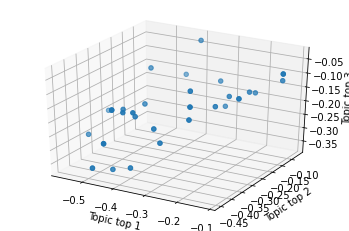

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_copy_train[:,0], X_lsa_copy_train[:,1], X_lsa_copy_train[:,2], marker='o')

ax.set_xlabel('Topic top 1')
ax.set_ylabel('Topic top 2')
ax.set_zlabel('Topic top 3')

plt.show()

(48, 3)


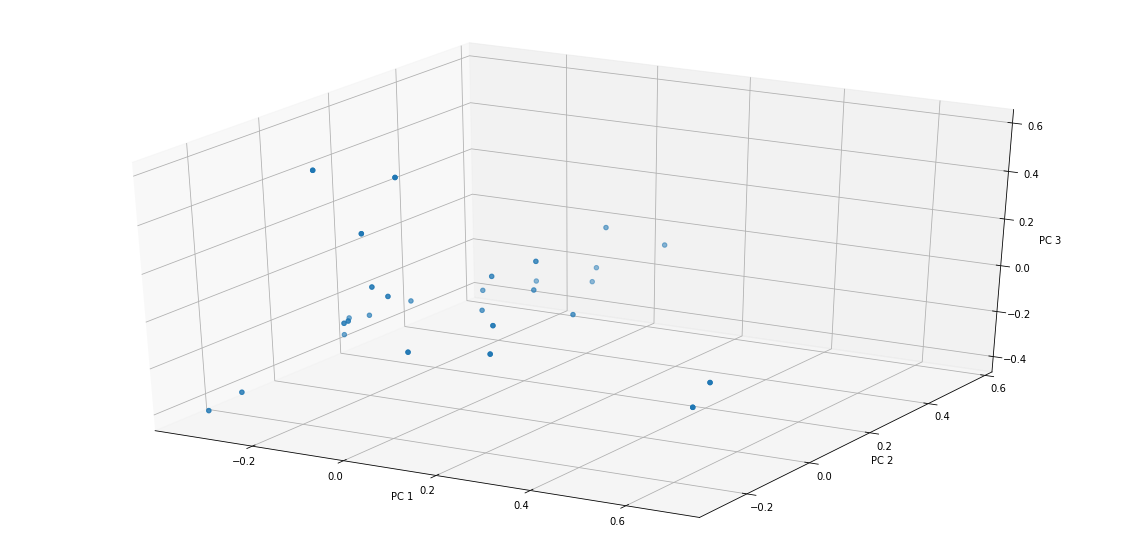

In [ ]:
# Aplicando PCA para análise semântica dos documentos
from sklearn.decomposition import PCA

X_lsa_3d_train = PCA(n_components=3, random_state=0).fit_transform(X_lsa_train)
print(X_lsa_3d_train.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d_train[:,0], X_lsa_3d_train[:,1], X_lsa_3d_train[:,2], marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

(48, 3)


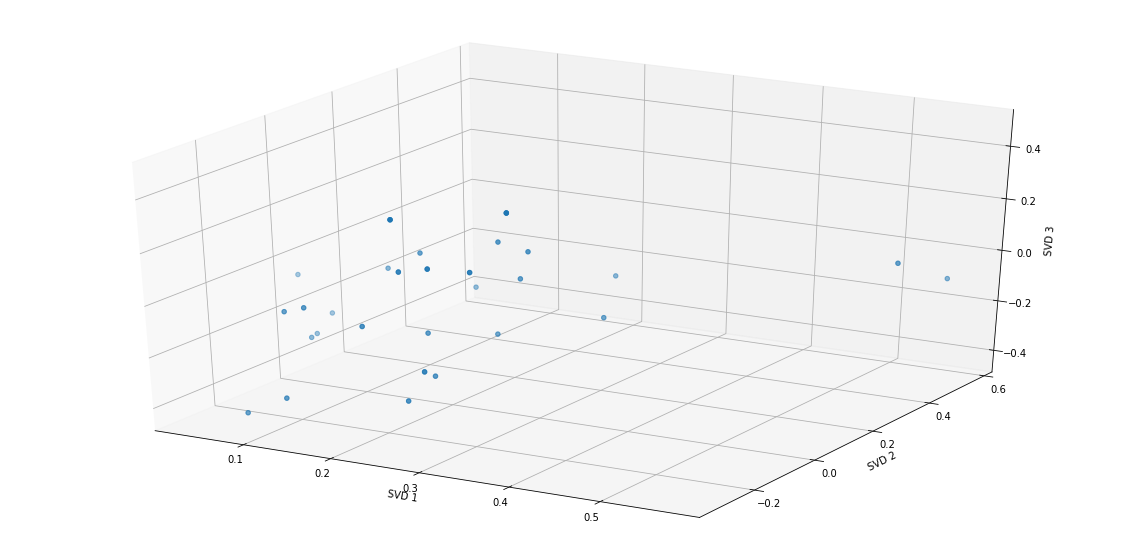

In [ ]:
# Análise dos Principais Componentes das Características TF-IDF --> TF-IDF - Trucated SVD se comporta tal como o LSA, logo, podemos ter características semelhantes
from sklearn.decomposition import TruncatedSVD

X_tfidf_3d_train = TruncatedSVD(n_components=3, random_state=0).fit_transform(X_tfidf_train)
print(X_tfidf_3d_train.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tfidf_3d_train[:,0], X_tfidf_3d_train[:,1], X_tfidf_3d_train[:,2], marker='o')

ax.set_xlabel('SVD 1')
ax.set_ylabel('SVD 2')
ax.set_zlabel('SVD 3')

plt.show()

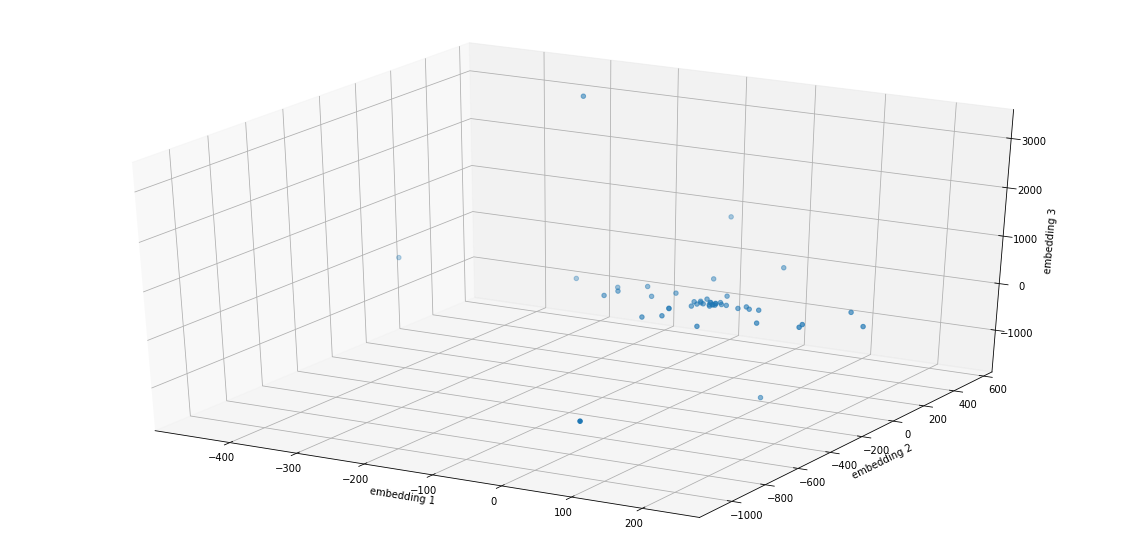

In [ ]:
from sklearn.manifold import TSNE

X_lsa_3d_tsne_train = TSNE(n_components=3, n_iter=250).fit_transform(X_lsa_train)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d_tsne_train[:,0], X_lsa_3d_tsne_train[:,1], X_lsa_3d_tsne_train[:,2], marker='o')

ax.set_xlabel('embedding 1')
ax.set_ylabel('embedding 2')
ax.set_zlabel('embedding 3')

plt.show();

# Transformando o texto de uma query em vetores de características

In [ ]:
# Pre processamento

final_list_stop_words = list_stop + custom_list_stop

query = 'o mercado financeiro entra em crise'

query_tokens = [token for token in word_tokenize(query, language='portuguese') if not token in final_list_stop_words]
print(query_tokens)
pre_processed_query = ' '.join(query_tokens)
print(pre_processed_query)

# Extração de características de contagem
X_query = count_vect.transform([pre_processed_query])
print('1a etapa de extração de características')
print(X_query)

# Extração de características de frequência TF-IDF
X_tfidf_query = tfidf_transformer.transform(X_query)
print('2a etapa de extração de características')
print(X_tfidf_query)

# Extração dos embeddings da query
X_lsa_query = svd.transform(X_tfidf_query)
print('3a etapa de extração de características')
print(X_lsa_query)



['mercado', 'financeiro', 'entra', 'crise']
mercado financeiro entra crise
1a etapa de extração de características
  (0, 201)	1
  (0, 356)	1
  (0, 486)	1
2a etapa de extração de características
  (0, 486)	0.6122281085599629
  (0, 356)	0.6122281085599629
  (0, 201)	0.5003533613139624
3a etapa de extração de características
[[ 0.04019376 -0.04012818  0.02499966 -0.01391262 -0.0320953   0.05367251
   0.01245119  0.03193558  0.00835823  0.05282732 -0.0017162   0.04747598
   0.02371996 -0.03816655  0.01465997 -0.02474761 -0.03492522 -0.00089581
  -0.00891288 -0.01227312  0.03441796 -0.00808071  0.07838946 -0.01360935
  -0.04805145  0.02423025 -0.05065488 -0.0639045   0.00675388  0.01291387
  -0.01576895  0.00791684 -0.01678311 -0.00555176  0.00327704 -0.00119728
  -0.02187501  0.00165126 -0.00983279  0.00299955  0.00904712  0.0272965
  -0.01814951 -0.02036337  0.01153349 -0.00150657 -0.00621653 -0.02602126]]


# Recuperar documentos mais relevantes dada uma query

In [ ]:
print(X_lsa_query.shape)

(1, 48)


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy

# Matriz de vetores dos documentos -> X_lsa
# Vetor da query -> X_lsa_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_lsa_train, X_lsa_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

o mercado financeiro entra em crise
Doc id:  27  Distance:  0.9091063737899432
Doc id:  8  Distance:  0.9185936023673484
Doc id:  1  Distance:  0.9233970077325964


In [ ]:
# Matriz de vetores dos documentos -> X_tfidf
# Vetor da query -> X_tfidf_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_tfidf_train, X_tfidf_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
o mercado financeiro entra em crise
Doc id:  27  Distance:  1.3367671166503547
Doc id:  8  Distance:  1.3432371836732424
Doc id:  35  Distance:  1.3465266277284371


In [ ]:
# Matriz de vetores dos documentos -> X
# Vetor da query -> X_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_train, X_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando Count Vectorizer')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando Count Vectorizer
o mercado financeiro entra em crise
Doc id:  14  Distance:  2.449489742783178
Doc id:  17  Distance:  3.1622776601683795
Doc id:  13  Distance:  3.1622776601683795


# Construindo um classificador de texto

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_tfidf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_features=5, max_depth=10, oob_score=True, verbose=2, random_state=0)

# Treinando uma RandomForest com as features TF-IDF dos documentos

In [ ]:
Y_train

array([2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0,
       2, 2, 2, 0])

In [ ]:
X_tfidf_train

<48x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2943 stored elements in Compressed Sparse Row format>

In [ ]:
rf_clf_tfidf.fit(X_tfidf_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000building tree 15 of 1000
building tree 16 of 1000

building tree 17 of 1000building tree 18 of 1000

building tree 19 of 1000building tree 20 of 1000

building tree 21 of 1000building tree 22 of 1000
building tree 23 of 1000

building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building t

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.5s


building tree 196 of 1000
building tree 197 of 1000

building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000building tree 204 of 1000

building tree 205 of 1000building tree 206 of 1000

building tree 207 of 1000building tree 208 of 1000

building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000

building tree 227 of 1000
building tree 228 of 1000building tree 229 of 1000
building tree 230 of 1000

building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    1.2s


building tree 381 of 1000building tree 382 of 1000

building tree 383 of 1000building tree 384 of 1000

building tree 385 of 1000
building tree 386 of 1000building tree 387 of 1000
building tree 388 of 1000

building tree 389 of 1000building tree 390 of 1000

building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000building tree 416 of 1000

building tree 417 of 1000
building tree 418 of 1000building tree

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    2.2s


building tree 696 of 1000

building tree 697 of 1000building tree 698 of 1000
building tree 699 of 1000

building tree 700 of 1000building tree 701 of 1000

building tree 702 of 1000
building tree 703 of 1000building tree 704 of 1000

building tree 705 of 1000
building tree 706 of 1000
building tree 707 of 1000building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000
building tree 714 of 1000

building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000

building tree 721 of 1000building tree 722 of 1000
building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000
building tree 726 of 1000
building tree 727 of 1000
building tree 728 of 1000
building tree 729 of 1000
building tree 730 of 1000
building tree 731 of 1000
building tree 732 of 1000
building tree 733 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestClassifier(max_depth=10, max_features=5, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=2)

In [ ]:
print(rf_clf_tfidf.feature_importances_)

[5.16074136e-04 3.57814045e-04 4.94669032e-04 3.87248510e-04
 7.35988922e-04 3.44213548e-03 1.13857607e-03 2.37175364e-03
 6.09819958e-04 5.67807566e-04 2.44310098e-04 3.72713077e-03
 1.81594289e-03 1.63406530e-03 2.27989274e-03 5.49628500e-04
 3.79268942e-04 6.50176307e-04 3.66544067e-04 1.70379574e-03
 7.36059213e-05 4.01894326e-04 1.80267271e-04 6.88099920e-04
 3.71733335e-04 1.26525206e-03 1.16191273e-03 4.62958542e-04
 5.88684252e-04 8.09396015e-04 5.57667794e-04 5.49990935e-04
 1.81983534e-03 5.23534576e-04 5.39057121e-04 3.25639886e-04
 4.64851086e-04 5.26410495e-03 4.52915113e-04 1.92815223e-04
 3.42971019e-04 5.71610673e-03 9.19176163e-04 3.01581440e-04
 8.40584739e-04 0.00000000e+00 5.07376573e-04 6.48191938e-04
 2.17571041e-04 2.27945389e-03 1.89297793e-04 5.50875274e-04
 9.56881941e-04 1.82305687e-04 1.52600338e-04 6.27089450e-03
 8.50416320e-04 3.38499797e-04 4.32856530e-04 3.36843973e-03
 1.70841057e-03 6.45157457e-04 3.05881235e-04 4.98176106e-04
 9.82315564e-04 9.869467

In [ ]:
min(rf_clf_tfidf.feature_importances_)

0.0

In [ ]:
print('Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf_train, Y_train))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.2s


Média da acurácia das classes:  0.9791666666666666


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


# Avaliação do classificador com a base teste

In [ ]:
x_test

9     Ao longo do tempo, a maneira como a felicidade...
34    Apesar do fato que títulos soberanos represent...
12    Conferencia proferida no Lyceu Parahybano, a c...
25    O presente trabalho busca compreender como a g...
11    Ginés de Sepúlveda é um cronista real do sécul...
43    Pelos deputados de Pernambuco terá João Alfred...
10    Ginés de Sepúlveda é um cronista real do sécul...
23    O fechamento prematuro das organizações coloca...
45    Três cartas falando de uma companhia de imigra...
0     Este trabalho dedica-se a estudar as obras Sto...
21    Vendo que cada vez mais os jovens universitári...
59    Agradece a remoção de um seu recomendado. As n...
Name: abstract, dtype: object

In [ ]:
# Pre processamento _XTEST
documents_tokens_x_test = []
for doc in x_test:
    documents_tokens_x_test.append(
        [token.lower() for token in word_tokenize(doc, language='portuguese') if not token.lower() in final_list_stop_words]
    )
pre_processed_documents_test = [' '.join(doc) for doc in documents_tokens_x_test]

# Extração de características de contagem
X_test = count_vect.transform(pre_processed_documents_test)
print('1a etapa de extração de características')
print(X_test.shape)

# Extração de características de frequência TF-IDF
X_tfidf_test = tfidf_transformer.transform(X_test)
print('2a etapa de extração de características')
print(X_tfidf_test.shape)

# Extração dos embeddings
X_lsa_test = svd.transform(X_tfidf_test)
print('3a etapa de extração de características')
print(X_lsa_test.shape)


1a etapa de extração de características
(12, 1000)
2a etapa de extração de características
(12, 1000)
3a etapa de extração de características
(12, 48)


In [ ]:
X_tfidf_test

<12x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 388 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

array([0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
print('[TF-IDF] Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf_test, y_test))


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.1s


[TF-IDF] Média da acurácia das classes:  0.75


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [ ]:
rf_clf_tfidf.predict(X_tfidf_query)[0]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


2

In [ ]:
# Matriz de vetores dos documentos -> X_tfidf
# Vetor da query -> X_tfidf_test[0]
# Recuperar k documentos mais relevantes a query
k = 5

ouput_distances = pairwise_distances(X_tfidf_train, X_tfidf_test[0, :], metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
Doc id:  43  Distance:  0.0
Doc id:  25  Distance:  1.2511458329983707
Doc id:  31  Distance:  1.2511458329983707
Doc id:  36  Distance:  1.2670024149280052
Doc id:  10  Distance:  1.2670024149280052


In [ ]:
df_documents.to_csv('df_documents.csv')

# Aplicando GloVe


In [ ]:
!pip install glove-python-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import glove 

In [ ]:
!wget "http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s100.zip" 
!unzip "/content/download.php?file=embeddings%2Fglove%2Fglove_s100.zip"

--2022-10-19 23:40:46--  http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s100.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348388454 (332M) [application/octet-stream]
Saving to: ‘download.php?file=embeddings%2Fglove%2Fglove_s100.zip.1’

download.php?file=e 100%[===================>] 332.25M  11.2MB/s    in 35s     

2022-10-19 23:41:21 (9.61 MB/s) - ‘download.php?file=embeddings%2Fglove%2Fglove_s100.zip.1’ saved [348388454/348388454]

Archive:  /content/download.php?file=embeddings%2Fglove%2Fglove_s100.zip
replace glove_s100.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: glove_s100.txt          y



In [ ]:
import itertools
from gensim.models.word2vec import Text8Corpus
#from glove import Corpus, Glove

glove_path = '/content/glove_s100.txt'
sentences = list(itertools.islice(Text8Corpus(glove_path),None))

corpus = glove.Corpus()

corpus.fit(sentences, window=10)

glove = glove.Glove(no_components=100, learning_rate=0.05)

glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)

glove.add_dictionary(corpus.dictionary)

glove.most_similar('Sêneca', number=10)


